In [1]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import cv2

In [2]:
# Step 1: Initialize the CNN
classifier = Sequential()

# Step 2: Add Convolution and Pooling Layers
classifier.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Second Convolutional Layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3: Flattening
classifier.add(Flatten())

# Step 4: Full Connection (Dense Layers)
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dense(units=2, activation='softmax'))  # Use softmax for multi-class classification

# Compile the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier


c:\Users\SAI\Downloads\Plant-Leaf-Disease-Prediction-master\app\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [7]:
# Step 5: Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Dataset/train',  # Relative path to the training dataset
    target_size=(128, 128),
    batch_size=6,
    class_mode='categorical'
)

valid_set = test_datagen.flow_from_directory(
    'Dataset/val',  # Relative path to the validation dataset
    target_size=(128, 128),
    batch_size=3,
    class_mode='categorical'
)


Found 43 images belonging to 2 classes.


Found 33 images belonging to 2 classes.


In [8]:
# Print Class Labels
labels = training_set.class_indices
print("Class Labels:", labels)

Class Labels: {'Tomato - Healthy': 0, 'Tomato_disease': 1}


In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best_saved_model1.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [10]:
# Step 6: Train the Model
classifier.fit(
    training_set,
    # steps_per_epoch=20,  # Total training steps per epoch
    epochs=50,           # Number of epochs
    validation_data=valid_set,
    callbacks=[model_checkpoint_callback]
)

# Step 7: Save the Model
# classifier_json = classifier.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(classifier_json)

# Save weights and the full model
# classifier.save_weights("my_model_weights.h5")
# classifier.save("model.h5")
# print("Model saved successfully!")

# Step 8: Prediction Example (Uncomment when testing)
"""
import cv2
import matplotlib.pyplot as plt

# Load and preprocess a test image
img = cv2.imread('Dataset/test/test_image.jpg')  # Update with a test image path
img_resize = cv2.resize(img, (128, 128))
rgb_img = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

# Predict
img_rank4 = np.expand_dims(rgb_img / 255, axis=0)  # Normalize and expand dimensions
predictions = classifier.predict(img_rank4)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the highest probability

# Map index to class label
class_label = list(labels.keys())[predicted_class]
print("Predicted Class:", class_label)
"""


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.6971 - loss: 0.6526 - val_accuracy: 0.4242 - val_loss: 0.6860
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4818 - loss: 0.6998 - val_accuracy: 0.8485 - val_loss: 0.4621
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6615 - loss: 0.5875 - val_accuracy: 0.8485 - val_loss: 0.4305
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.7730 - loss: 0.4459 - val_accuracy: 0.7879 - val_loss: 0.4282
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7968 - loss: 0.5279 - val_accuracy: 0.8485 - val_loss: 0.4689
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9126 - loss: 0.3311 - val_accuracy: 0.8182 - val_loss: 0.4087
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8250 - loss: 0.3095 - val_accuracy: 0.8485 - val_loss: 0.4753
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9432 - loss: 0.1547 - val_accuracy: 0.8485 - val_loss:

'\nimport cv2\nimport matplotlib.pyplot as plt\n\n# Load and preprocess a test image\nimg = cv2.imread(\'Dataset/test/test_image.jpg\')  # Update with a test image path\nimg_resize = cv2.resize(img, (128, 128))\nrgb_img = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)\n\n# Display the image\nplt.imshow(rgb_img)\nplt.axis(\'off\')\nplt.show()\n\n# Predict\nimg_rank4 = np.expand_dims(rgb_img / 255, axis=0)  # Normalize and expand dimensions\npredictions = classifier.predict(img_rank4)\npredicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the highest probability\n\n# Map index to class label\nclass_label = list(labels.keys())[predicted_class]\nprint("Predicted Class:", class_label)\n'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Class: Tomato_disease


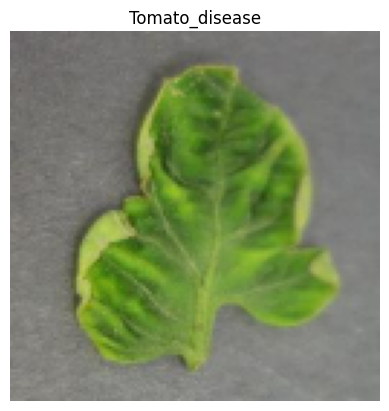

In [ ]:
# Load and preprocess a test image
img = cv2.imread(r'Dataset\test\Tomato___Tomato_Yellow_Leaf_Curl_Virus (1).JPG')  # Update with a test image path
img_resize = cv2.resize(img, (128, 128))
rgb_img = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)

# Predict
model = load_model("best_saved_model.keras")
img_rank4 = np.expand_dims(rgb_img / 255, axis=0)  # Normalize and expand dimensions
predictions = model.predict(img_rank4)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the highest probability

# Map index to class label
class_label = list(labels.keys())[predicted_class]
print("Predicted Class:", class_label)

import matplotlib.pyplot as plt
# Display the image
plt.imshow(rgb_img)
plt.title(f"{class_label}")
plt.axis('off')
plt.show()
